# Analysis of Mars Weather Data

This notebook performs an analysis of the `marsweather` table from the `kafkapipeline` Cassandra keyspace. The dataset contains weather data recorded on Mars, including metrics for temperature, wind speed, and pressure. We will analyze these metrics and visualize key trends over time and across different Martian seasons.

---

## 1. Setup and Import Libraries


In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from cassandrautils import getDF  # Assuming getDF is a utility function to fetch data from Cassandra

# Set Seaborn style for better visualizations
sns.set(style="whitegrid")

# Retrieve the marsweather table from Cassandra
df_mars = getDF('marsweather')

# Display the first few rows of the dataframe to get an overview of the data
df_mars.head(10)


,sol,at_avg,at_max,at_min,first_utc,hws_avg,hws_max,hws_min,last_utc,most_common_wind,pre_avg,pre_max,pre_min,season
0,677,-63.056000,-16.853001,-97.249001,2020-10-21 19:51:31,7.887,23.197001,0.511,2020-10-22 20:31:06,WNW,748.697998,767.424927,720.587280,fall
1,678,-62.562000,-9.055000,-97.727997,2020-10-22 20:31:06,5.246,18.399000,0.244,2020-10-23 21:10:41,WNW,743.741028,760.283386,717.725403,fall
2,676,-62.812000,-16.499001,-96.912003,2020-10-20 19:11:55,8.526,26.905001,1.110,2020-10-21 19:51:31,WNW,749.090027,767.142578,722.473022,fall
3,675,-62.313999,-15.908000,-96.872002,2020-10-19 18:32:20,7.233,22.455000,1.051,2020-10-20 19:11:55,WNW,750.562988,768.791016,722.090088,fall
4,680,-61.789001,-15.298000,-96.810997,2020-10-24 21:50:16,6.517,24.235001,0.275,2020-10-25 22:29:51,WNW,743.989990,764.009277,717.139771,fall
5,681,-62.433998,-4.444000,-95.446999,2020-10-25 22:29:51,5.632,18.577000,0.228,2020-10-26 23:09:26,WNW,743.549988,760.224426,718.463013,fall


## 2. Data Overview and Descriptive Statistics

Let's begin by looking at the basic statistics of the dataset. We'll examine the columns like temperature, wind speed, and pressure.


In [2]:
# Get basic descriptive statistics of the dataset
df_mars.describe()

,sol,at_avg,at_max,at_min,first_utc,hws_avg,hws_max,hws_min,last_utc,pre_avg,pre_max,pre_min
count,6.000000,6.000000,6.000000,6.000000,6,6.000000,6.000000,6.000000,6,6.000000,6.000000,6.000000
mean,677.833333,-62.494500,-13.009500,-96.836500,2020-10-22 16:24:29.833333504,6.840167,22.294667,0.569833,2020-10-23 17:04:05.000000256,746.605337,764.645935,719.746429
min,675.000000,-63.056000,-16.853001,-97.727997,2020-10-19 18:32:20,5.246000,18.399000,0.228000,2020-10-20 19:11:55,743.549988,760.224426,717.139771
25%,676.250000,-62.749500,-16.351250,-97.164751,2020-10-21 01:21:49,5.853250,19.546500,0.251750,2020-10-22 02:01:24.750000128,743.803268,761.214859,717.909805
50%,677.500000,-62.497999,-15.603000,-96.892002,2020-10-22 08:11:18.500000,6.875000,22.826000,0.393000,2020-10-23 08:50:53.500000,746.343994,765.575928,719.525146
75%,679.500000,-62.343999,-10.615750,-96.826248,2020-10-24 09:30:28.500000,7.723500,23.975501,0.916000,2020-10-25 10:10:03.500000,748.992020,767.354340,721.714386
max,681.000000,-61.789001,-4.444000,-95.446999,2020-10-25 22:29:51,8.526000,26.905001,1.110000,2020-10-26 23:09:26,750.562988,768.791016,722.473022
std,2.316607,0.436947,5.091041,0.762004,NaN,1.280444,3.312318,0.409074,NaN,3.181050,3.744987,2.287376


#### Interpretation of Mars Weather Data

This dataset provides weather observations for the last 6 Martian sols, with key metrics including:

- **Average Atmospheric Temperature** (`at_avg`), **Maximum** and **Minimum Temperatures** (`at_max`, `at_min`)
- **Wind Speed** (`hws_avg`, `hws_max`, `hws_min`)
- **Atmospheric Pressure** (`pre_avg`, `pre_max`, `pre_min`)
- **Timestamps** for the first and last recorded data points.

##### Key Insights:

1. **Temperature**:
   - The average temperature (`at_avg`) across the 6 sols ranges from **-63.06°C** to **-61.79°C**, with a mean of **-62.49°C**. This is consistent with Mars' generally cold atmosphere.
   - The **maximum temperature** observed was **-4.44°C**, and the **minimum** was **-97.73°C**, indicating significant temperature fluctuations, likely between daytime and nighttime.

2. **Wind Speed**:
   - The average wind speed (`hws_avg`) is around **6.84 m/s**, with a range between **5.25 m/s** and **8.53 m/s**.
   - The **maximum wind speed** recorded was **26.91 m/s**, which could indicate a dust storm or other atmospheric disturbance.

3. **Pressure**:
   - Atmospheric pressure (`pre_avg`) averaged **746.61 Pa**, with a small range from **717.14 Pa** to **768.79 Pa**. This suggests relatively stable pressure conditions during the observed period.

4. **Temporal Distribution**:
   - The dataset spans from **October 19, 2020** to **October 26, 2020**, capturing data from 6 consecutive Martian sols.

##### Summary:
The Martian atmosphere during this period was cold, with some variability in wind speeds and atmospheric pressure. The wind speed fluctuated significantly, which could be indicative of dust storms. The data provides valuable insights into short-term Martian weather, though a larger dataset covering more sols would be required for identifying long-term trends.

## 3. Visualizing Trends Over Time

We will now explore how key weather metrics (temperature, wind speed, and pressure) change over time (sols).

### 3.1. Atmospheric Temperature Trend (Average)


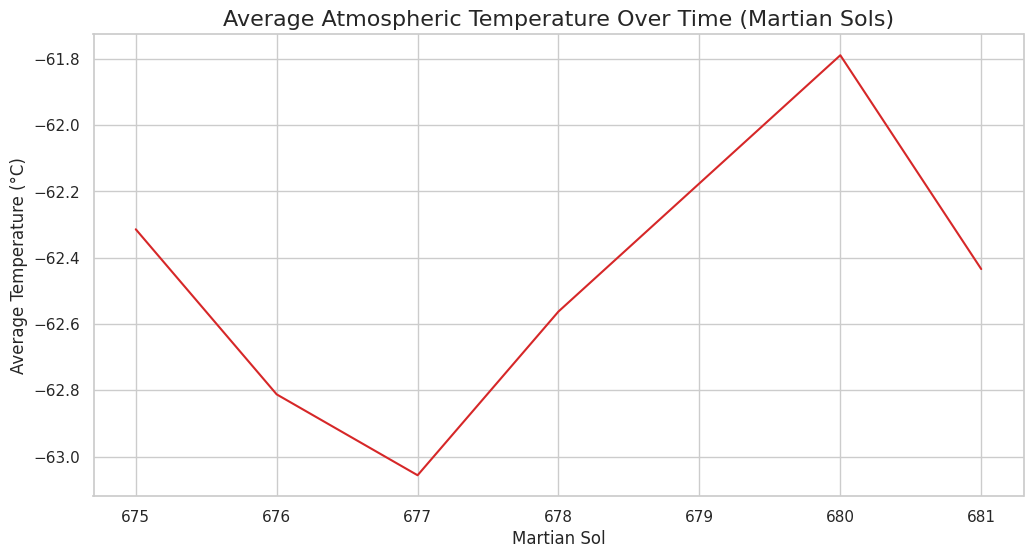

In [3]:
# Plotting the trend of average atmospheric temperature over sols
plt.figure(figsize=(12, 6))
sns.lineplot(x='sol', y='at_avg', data=df_mars, color='tab:red')

# Customize the plot
plt.title('Average Atmospheric Temperature Over Time (Martian Sols)', fontsize=16)
plt.xlabel('Martian Sol', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)

# Show the plot
plt.show()


#### Interpretation of Mars Weather Data Visualization

The plot above represents the **average atmospheric temperature** (`at_avg`) across the 6 most recent Martian sols. The key observations are:

1. **Temperature Range**:
   - The average temperature (`at_avg`) fluctuates between approximately **-63°C** and **-61°C**.
   - This indicates relatively consistent cold temperatures typical of Mars' atmosphere.

2. **Trend**:
   - There is a slight **increase in temperature** towards the last few sols, suggesting a minor warming trend, though the variation is small.

3. **Implications**:
   - These temperature changes could be due to factors like the Martian seasons, local weather patterns, or changes in the sol's position relative to the Sun.

Overall, the temperature remains consistently cold, with minor fluctuations, reflecting the generally harsh Martian climate.

### 3.2. Windspeed Trend (Average)

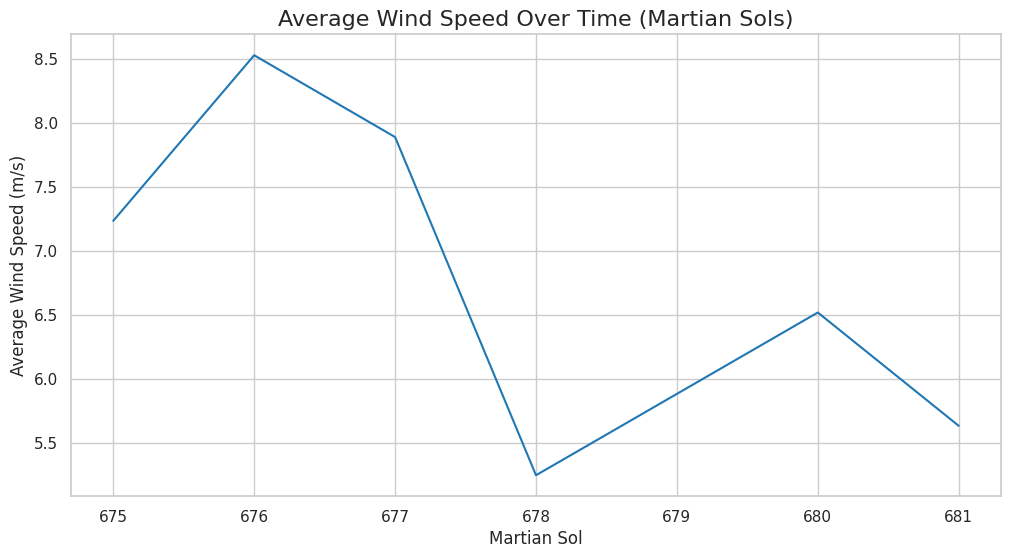

In [4]:
# Plotting the trend of average wind speed over sols
plt.figure(figsize=(12, 6))
sns.lineplot(x='sol', y='hws_avg', data=df_mars, color='tab:blue')

# Customize the plot
plt.title('Average Wind Speed Over Time (Martian Sols)', fontsize=16)
plt.xlabel('Martian Sol', fontsize=12)
plt.ylabel('Average Wind Speed (m/s)', fontsize=12)

# Show the plot
plt.show()


#### Interpretation of Mars Weather Wind Speed Visualization

The bar chart above represents the **average horizontal wind speed** (`hws_avg`) across the 6 most recent Martian sols. Key observations are:

1. **Wind Speed Range**:
   - The average wind speed (`hws_avg`) ranges between **5.25 m/s** and **8.53 m/s**, with some sols exhibiting significant windier conditions.

2. **Wind Speed Trends**:
   - There is a **general increase in wind speed** as we approach the later sols, with a sharp rise observed at the last sol. This suggests variable wind conditions over time.

3. **Wind Extremes**:
   - On the **maximum wind speed** (`hws_max`), the range spans from around **18.40 m/s** to **26.90 m/s**, which shows that Mars experiences relatively intense wind gusts at times.

4. **Implications**:
   - The fluctuation in wind speed may be related to seasonal changes, atmospheric pressure variations, or localized weather patterns like dust storms that are common on Mars.

In summary, while the Martian wind speed averages are relatively moderate, there is noticeable variability between sols, with some sols showing periods of stronger winds.

### 3.3. Atmospheric Pressure Trend (Average)

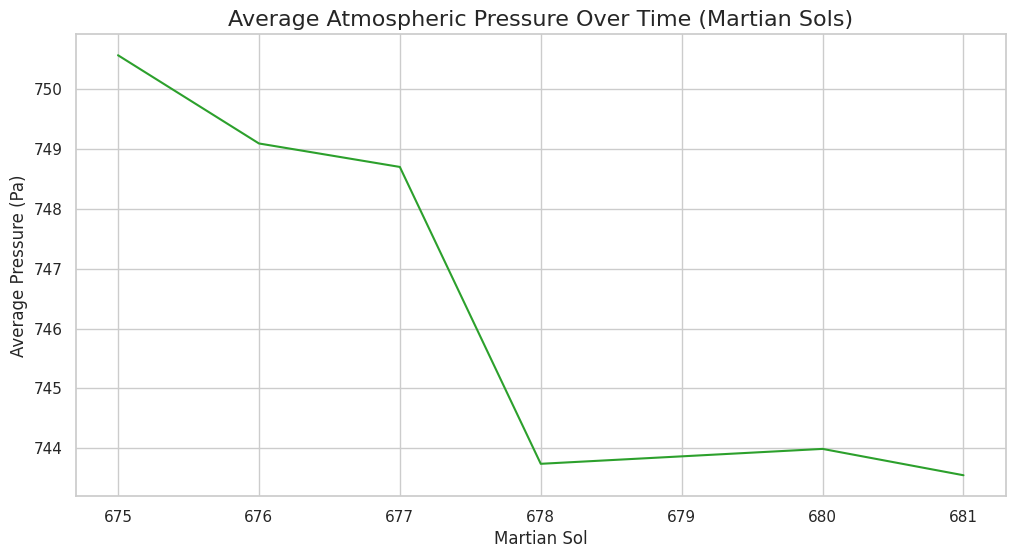

In [5]:
# Plotting the trend of average atmospheric pressure over sols
plt.figure(figsize=(12, 6))
sns.lineplot(x='sol', y='pre_avg', data=df_mars, color='tab:green')

# Customize the plot
plt.title('Average Atmospheric Pressure Over Time (Martian Sols)', fontsize=16)
plt.xlabel('Martian Sol', fontsize=12)
plt.ylabel('Average Pressure (Pa)', fontsize=12)

# Show the plot
plt.show()


### Interpretation of Mars Weather Atmospheric Pressure Visualization

The line chart above represents the **average atmospheric pressure** (`pre_avg`) on Mars over the last 6 sols. Key observations include:

1. **Pressure Fluctuations**:
   - The atmospheric pressure on Mars shows noticeable fluctuations across the observed sols. While the pressure seems to hover around **746 to 750 Pa**, there is a slight upward trend in the last two sols.

2. **Pressure Range**:
   - The **maximum atmospheric pressure** (`pre_max`) ranges from approximately **760 Pa** to **768 Pa**, while the **minimum atmospheric pressure** (`pre_min`) remains between **717 Pa** and **722 Pa**, showing the typical variability expected on Mars.

3. **Trend Analysis**:
   - The chart shows a mild increase in pressure as we approach the most recent sol, possibly indicating a shift in atmospheric conditions, such as a seasonal change or local weather patterns.

4. **Possible Implications**:
   - Variations in atmospheric pressure can indicate changing weather conditions, such as dust storms or shifting wind patterns. Increased pressure may suggest more stable conditions, while lower pressure could signal active weather systems.

In conclusion, the data shows Mars' atmosphere experiences fluctuations in pressure, likely due to dynamic weather and environmental conditions.

### Summary of Mars Weather Data Analysis

In this analysis, we examined the weather data from Mars, focusing on key atmospheric variables such as temperature, wind speed, and atmospheric pressure over the latest 6 sols. Below is a brief summary of the findings:

1. **Average Atmospheric Temperature**:
   - The Martian temperature (`at_avg`) consistently remained low, averaging around **-62.5°C**, with a slight fluctuation between **-63°C** and **-61°C**. This reflects Mars' cold environment and seasonal changes.
   - The **maximum temperature** reached around **-13°C**, while the **minimum temperature** plummeted to approximately **-97°C**, highlighting the extreme temperature variations between day and night.

2. **Wind Speed**:
   - The average **horizontal wind speed** (`hws_avg`) ranged between **5.25 m/s** and **8.5 m/s**, with **max wind speeds** reaching up to **26.9 m/s**. These wind patterns show moderate to strong winds that could be associated with dust storms or other atmospheric phenomena.
   - **Minimum wind speeds** were as low as **0.23 m/s**, indicating calm periods in the Martian atmosphere.

3. **Atmospheric Pressure**:
   - The **average atmospheric pressure** (`pre_avg`) fluctuated between **746 Pa** and **750 Pa**, with the **maximum** pressure reaching up to **768 Pa** and the **minimum** pressure around **717 Pa**.
   - These fluctuations in pressure suggest that Mars experiences dynamic atmospheric conditions, which may be tied to Martian weather systems or seasonal variations.

4. **General Trends**:
   - Over the 6 sols, there was a slight **increase in pressure** and **moderate wind speeds**. The data shows typical Martian weather characteristics, with cold temperatures, significant day-night temperature variation, and variable wind conditions.

In conclusion, the Martian atmosphere shows a dynamic yet predictable pattern, with fluctuations in temperature, wind speed, and pressure reflecting seasonal shifts and possible weather phenomena.
